In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('SLS22.csv')

# 1 Uppvärmning. 
Följande uppgifter bör göra dig bekant med datamängden och förbereda data för användning när du bygger dina prediktiva modeller.

(a) Alla betyg i dataramen är för närvarande tal mellan 0 och 10. Normalisera dessa värden i dataramen så att de är mellan 0 och 1.

In [5]:
for col in df.columns:
    if df[col].dtype == np.float64:
        df[col] = df[col].apply(lambda x: x/10)

(b) Gör ett histogram för alla trickbetyg för trick 1−4. Vad observerar du? Finns det ett visst värde som dyker upp oftare än de andra? Om så är fallet, hur står detta värde i jämförelse med de andra?

<AxesSubplot: ylabel='Frequency'>

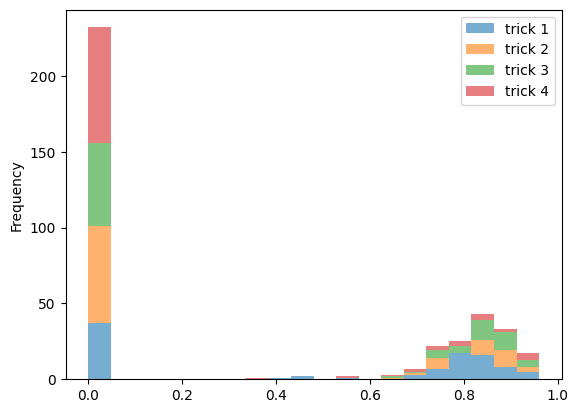

In [20]:
df[['trick 1', 'trick 2', 'trick 3', 'trick 4']].plot.hist(bins=20, stacked=True, alpha=0.6)

Svar: Det är tydligt att det absolut vanligaste talet är 0, dvs. att åkaren ej klarar trickcet.

(c) For varje trick 1−4 skapa en ny kolumn med namnet ’make i’ för i = 1, 2, 3, 4 så att värdet av ’make i’ i en given rad är 1 om skateboardåkaren landade trick i och 0 annars.

In [9]:
for i in range(1, 5):
    df[f"make {i}"] = df[f"trick {i}"].apply(lambda x: 1 if x > 0 else 0)

(d) För varje skateboardåkare skatta sannolikheten att ett trick får ett betyg som är större än 0.6 givet att skateboardåkaren landar tricket. Vad är sanno- likheten att skateboardåkaren inte lyckas landa ett visst trick? Vad observerar du? Relatera dina observationer till era observationer i del (b).

In [26]:
def compute_stats(group):
    passed, failed = 0, 0
    for i in range(1, 5):
        trick_col, make_col = f'trick {i}', f'make {i}'
        passed += group.loc[group[trick_col] > 0.6, make_col].sum()
        failed += group.loc[group[trick_col] <= 0.6, make_col].sum()
    return pd.Series([passed, failed, passed / (passed + failed)], index=['made', 'missed', 'make %'])

results = df.groupby('id').apply(compute_stats).reset_index()
print(results)

           id  made  missed    make %
0      Berger   2.0     0.0  1.000000
1     Decenzo   7.0     0.0  1.000000
2       Eaton   5.0     0.0  1.000000
3         Foy   6.0     0.0  1.000000
4        Fynn   6.0     0.0  1.000000
5     Gustavo   8.0     0.0  1.000000
6       Hoban   8.0     0.0  1.000000
7     Hoefler   7.0     0.0  1.000000
8    Horigome   9.0     0.0  1.000000
9      Huston   3.0     0.0  1.000000
10     Jordan   8.0     0.0  1.000000
11     Joslin   9.0     0.0  1.000000
12    Majerus   1.0     2.0  0.333333
13    McClung   0.0     1.0  0.000000
14     Midler   4.0     0.0  1.000000
15      Milou   9.0     0.0  1.000000
16       Mota   3.0     0.0  1.000000
17   Oliveira   5.0     0.0  1.000000
18    O’neill   3.0     0.0  1.000000
19       Papa   7.0     0.0  1.000000
20    Pudwill   1.0     2.0  0.333333
21  Ribeiro C   3.0     0.0  1.000000
22  Ribeiro G  13.0     0.0  1.000000
23  Rodriguez   4.0     0.0  1.000000
24   Santiago   0.0     1.0  0.000000
25     Shira

Svar: Om en skateboardare klarar tricket så får de nästan alltid ett betyg över 0.6. Detta ser man också i histogrammen.

(e) Gör ett spridningsdiagram för runbetyg 1 mot runbetyg 2. Ser du någon tydligt korrelation från diagrammet?

0.19053845069841102


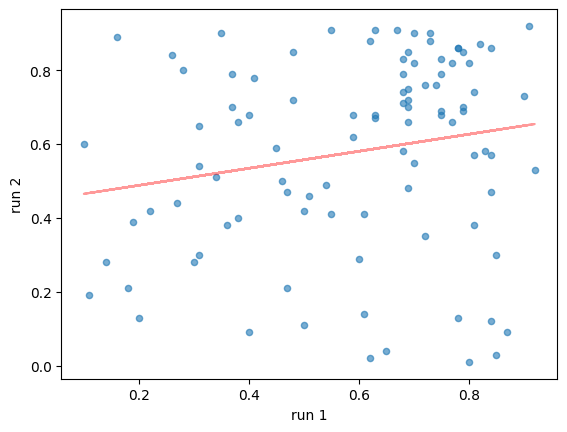

In [37]:
df.plot.scatter(x='run 1', y='run 2', alpha=0.6)
z = np.polyfit(df['run 1'], df['run 2'], 1)
p = np.poly1d(z)
ro = np.corrcoef(df['run 1'], df['run 2'])[0, 1]
plt.plot(df['run 1'],p(df['run 1']),"r-", alpha=0.4)
print(ro)
plt.show()

Svar: Väldigt svag positiv korrerlation, ro=0.19. Många värden verkar vara koncentrerade i övre högra hörnet, men annars är spridningen väldigt stor.